#Import statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/onlineretail dataset.csv - onlineretail dataset.csv')

data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: '/content/onlineretail dataset.csv - onlineretail dataset.csv'

In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#Data Preprocessing

In [ ]:
data.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Standardize date format and extract additional date information
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Standardize text format in Description column
data['Description'] = data['Description'].str.lower()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the number of missing values in each column
missing_values_count = data.isnull().sum()

# Display the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values_count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of missing values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
Month          0
Day            0
dtype: int64


In [4]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'data' is not defined

#Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-c9299c40a4b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/lo

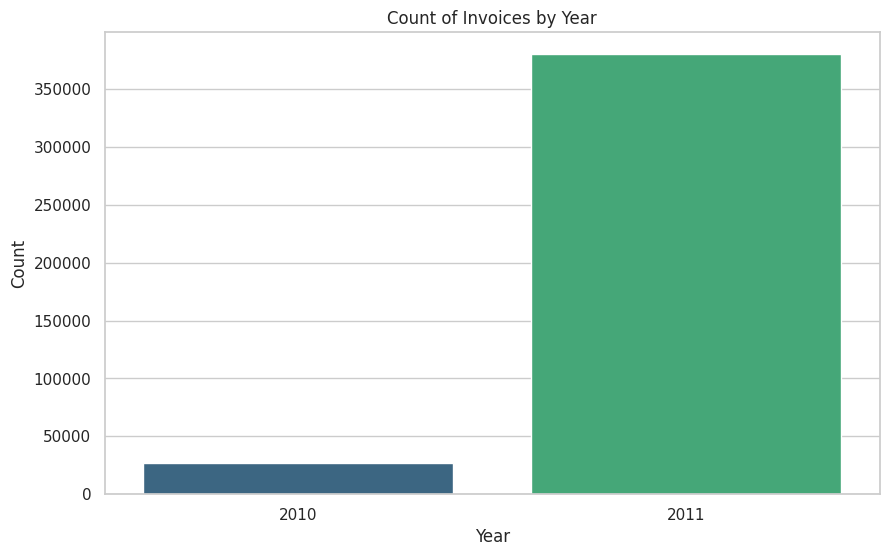

<ipython-input-24-c9299c40a4b9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Country', data=data, palette='magma', order=data['Country'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_com

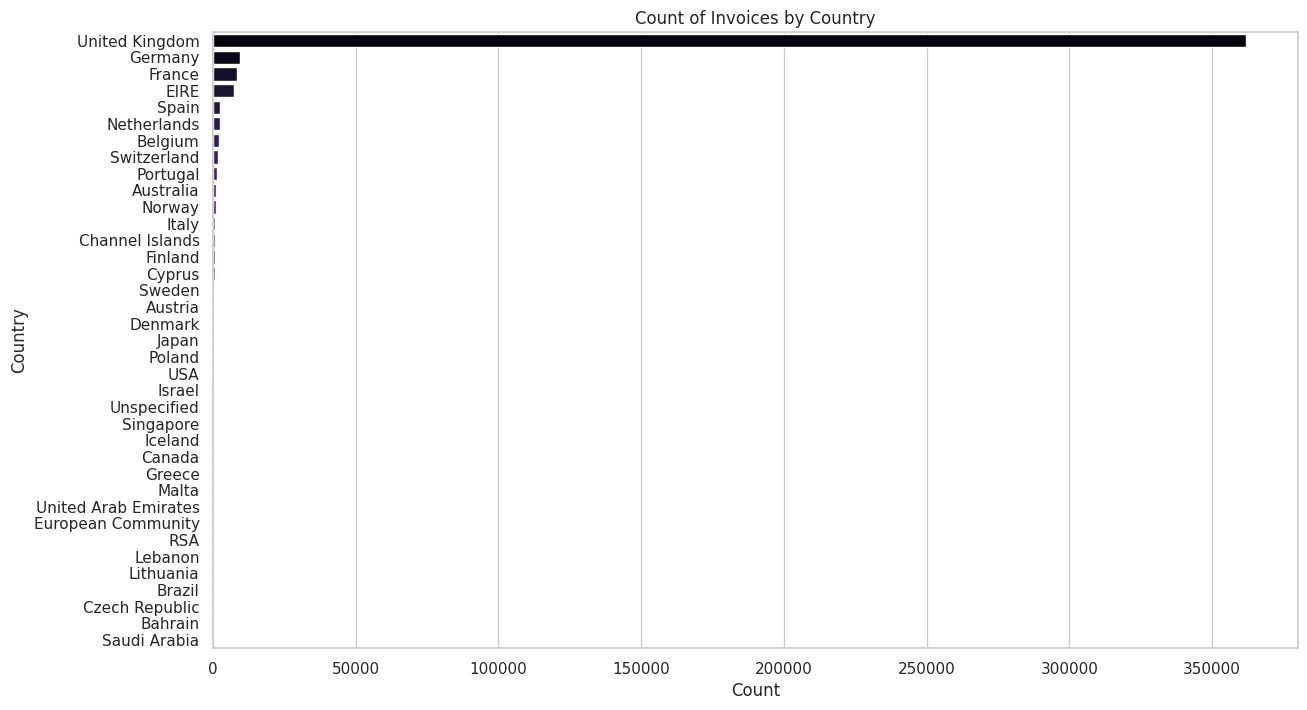

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Plotting count of invoices by year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Count of Invoices by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Plotting count of invoices by country
plt.figure(figsize=(14, 8))
sns.countplot(y='Country', data=data, palette='magma', order=data['Country'].value_counts().index)
plt.title('Count of Invoices by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#Find the country that has a greater number of transactions

In [ ]:
# Calculate the count of transactions for each country
transactions_by_country = data['Country'].value_counts()

# Find the country with the maximum count of transactions
country_with_most_transactions = transactions_by_country.idxmax()

# Print the country with the greatest number of transactions
print("Country with the greatest number of transactions:", country_with_most_transactions)

Country with the greatest number of transactions: United Kingdom


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Find the invoice number which has a greater number of products

In [ ]:
# Calculate the total quantity of products for each invoice number
total_quantity_by_invoice = data.groupby('InvoiceNo')['Quantity'].sum()

# Find the invoice number with the maximum total quantity of products
invoice_with_most_products = total_quantity_by_invoice.idxmax()

# Print the invoice number with the greatest number of products
print("Invoice number with the greatest number of products:", invoice_with_most_products)

Invoice number with the greatest number of products: 581483


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Find the support for each product

In [ ]:
# Calculate the support for each product
product_support = data['StockCode'].value_counts(normalize=True)

# Print the support for each product
print("Support for each product:")
print(product_support)

Support for each product:
85123A    0.005105
22423     0.004683
85099B    0.004085
84879     0.003485
47566     0.003481
            ...   
84620     0.000002
90038B    0.000002
84551     0.000002
84614A    0.000002
20957     0.000002
Name: StockCode, Length: 3684, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Set the threshold value for support

In [ ]:
# Define the threshold value
threshold = 0.0  # For example, setting the threshold to 5%

# Calculate the support for each product
product_support = data['StockCode'].value_counts(normalize=True)

# Filter out products with support values below the threshold
frequent_products = product_support[product_support >= threshold]

# Print the frequent products
print("Frequent products with support greater than or equal to the threshold:")
print(frequent_products)

Frequent products with support greater than or equal to the threshold:
85123A    0.005105
22423     0.004683
85099B    0.004085
84879     0.003485
47566     0.003481
            ...   
84620     0.000002
90038B    0.000002
84551     0.000002
84614A    0.000002
20957     0.000002
Name: StockCode, Length: 3684, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Find out the frequent item set using Apriori Algorithm.

In [ ]:
# Convert the DataFrame to a transaction format suitable for Apriori
basket = (data.groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert the transaction data to a one-hot encoded format
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print("Association Rules:")
print(rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
    support  itemsets
0  0.060425   (20725)
1  0.050965   (21212)
2  0.053745   (22197)
3  0.076795   (22423)
4  0.053552   (22720)
5  0.065097   (47566)
6  0.056178   (84879)
7  0.080772  (85099B)
8  0.085058  (85123A)
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


#Find an alternative for Apriori Algorithm

In [ ]:
# Convert the DataFrame to a transaction format suitable for FP-Growth
basket = (df_data.groupby(['InvoiceNo', 'StockCode'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Convert the transaction data to a one-hot encoded format
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.05, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print the association rules
print("Association Rules:")
print(rules)


#K means and DB Scan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

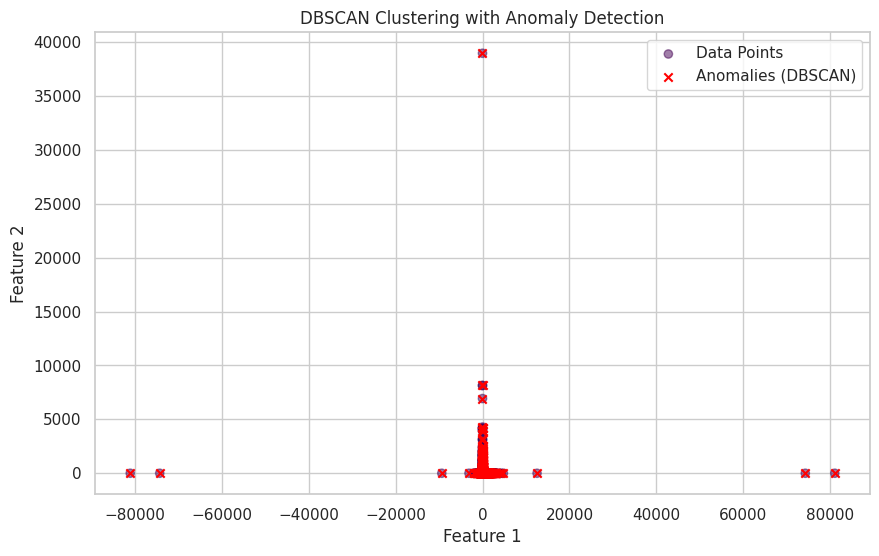

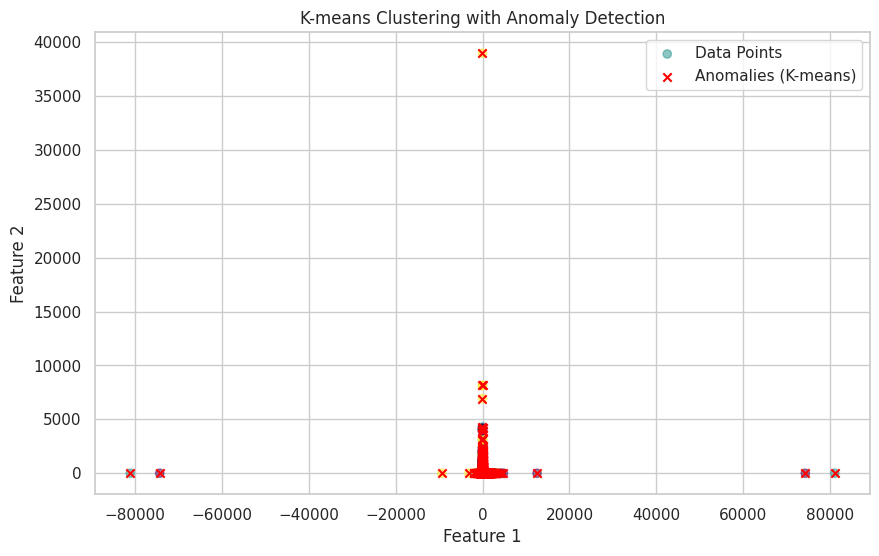

In [ ]:
# Data Preprocessing
# Select only numerical columns
df_numeric = data.select_dtypes(include=['int', 'float'])

# Drop rows with missing values
df_numeric.dropna(inplace=True)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_numeric)
anomalies_dbscan = df_numeric[dbscan.labels_ == -1]

# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_numeric)
distances = kmeans.transform(df_numeric)
anomalies_kmeans = df_numeric[distances.max(axis=1) > threshold]

# Plot anomalies detected by DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c=dbscan.labels_, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(anomalies_dbscan.iloc[:, 0], anomalies_dbscan.iloc[:, 1], color='red', marker='x', label='Anomalies (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()

# Plot anomalies detected by K-means
plt.figure(figsize=(10, 6))
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(anomalies_kmeans.iloc[:, 0], anomalies_kmeans.iloc[:, 1], color='red', marker='x', label='Anomalies (K-means)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering with Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()
